In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [2]:
data=load_digits()

In [3]:
data

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [76]:
X=data['data']
Y=data['target']
img=np.reshape(X[275],(8,8))

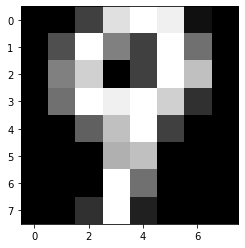

In [77]:
plt.imshow(img,cmap='gray')
plt.show()

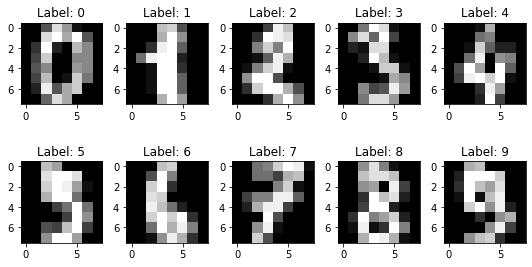

In [81]:
num_row = 2
num_col = 5
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(10):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(np.reshape(X[i],(8,8)), cmap='gray')
    ax.set_title('Label: {}'.format(Y[i]))
plt.tight_layout()
plt.show()

In [82]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X,Y, test_size=0.3)
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)

In [83]:
def refine_Y(Y):
    Y=np.array(Y)
    Y=np.reshape(Y,(len(Y),1))
    y_zero=np.zeros((10,len(Y)))
    for i in range(len(Y)):
        c=Y[i][0]
        y_zero[c][i]=1
    return y_zero
def parameter_initialize():
    a=np.random.rand(10,64)*0.01
    b=np.random.rand(10,1)
    return a,b
def Z(X,a,b):
    z=np.dot(X,a.T).T+b
    return z.T

def sigmoid(z):
    a=1/(1+np.exp(-z))
    return a

def foward(X,theta,b):
    z=Z(X,theta,b)
    a=sigmoid(z)
    return a.T

def cost(y_pred, y_ref):
    error=-(y_ref*np.log(y_pred)+(1-y_ref)*np.log(1-y_pred))
    
    return np.sum(error)/y_ref.shape[0]

def Dee_Z(y_pred,Y):
    dee_z=y_pred-Y
    return dee_z

def Dee_parameter(X,dz):
    dee_theta=np.dot(dz,X)/X.shape[0]
    dee_b=np.sum(dz, axis=1)/X.shape[0]
    dee_b=np.reshape(dee_b,(dz.shape[0],1))
    return dee_theta.T, dee_b

def back(X,Y,y_pred):
    dz=Dee_Z(y_pred,Y)
    dee_theta, dee_b=Dee_parameter(X,dz)
    return dee_theta, dee_b

def update(theta, b,dee_theta, dee_b, learning_rate):
    #print(theta.shape, dee_theta.shape)
    #print(dee_theta.shape, dee_b.shape)
    theta=theta-learning_rate*dee_theta.T
    b=b-learning_rate*dee_b
    #print(dee_theta.shape, dee_b.shape)
    return theta,b

def OneVsAll(X,Y):
    Y=refine_Y(Y)
    J,x=[],[]
    theta, b=parameter_initialize()
    for i in range(1000):
        y_pred=foward(X,theta,b)
        error=cost(y_pred,Y)
        x.append(i)
        J.append(error)
        dee_theta, dee_b=back(X,Y,y_pred)
        theta,b=update(theta, b,dee_theta, dee_b, 1)
        #print(error)
    plt.plot(x,J)
    return theta,b

def predict(X,theta,b):
    y_pred=foward(X,theta,b)
    y_pred=y_pred.T
    return y_pred.argmax(axis=1)
    

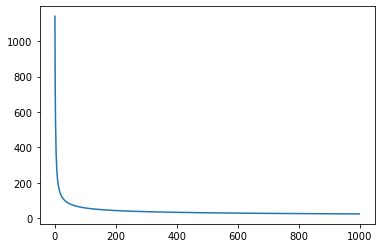

In [84]:
theta,b=OneVsAll(x_train,y_train)

In [85]:
ans=predict(x_test,theta,b)

In [86]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test, ans))
print(confusion_matrix(y_test,ans))

0.9611111111111111
[[48  0  0  0  0  1  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  1  0]
 [ 0  0 52  1  1  0  0  0  0  0]
 [ 0  0  0 52  0  0  0  0  2  0]
 [ 0  2  0  0 54  0  0  0  0  0]
 [ 0  0  0  0  0 53  0  0  0  0]
 [ 0  1  0  0  0  0 49  0  0  0]
 [ 0  0  0  1  0  0  1 64  0  1]
 [ 0  2  1  0  0  2  0  0 47  1]
 [ 0  1  0  0  0  0  0  1  1 50]]
